In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
samson = sio.loadmat("/home/josephg/Documents/EDAA_unmixing/Samson.mat")
sy = samson['Y'] / np.sqrt(np.sum(samson['Y']**2, axis=0))

In [3]:
sy = samson['Y'] / np.sqrt(np.sum(samson['Y']**2, axis=0))

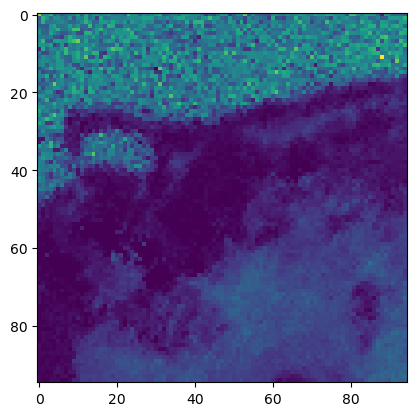

In [4]:
plt.imshow(sy[0].reshape(95,95))

In [5]:
class DA_NMF():
    def __init__(self, n_components=2, initial_regularization=1, decay_rate=1, delta=1):
        self.n_components = n_components
        self.initial_regularization = initial_regularization
        self.decay_rate = decay_rate
        self.delta=delta


    def _initialize(self, data):
        self.iteration = 0
        self.W = np.random.rand(data.shape[0], self.n_components)
        for i in range(self.n_components):
            self.W[:,i] = np.mean(data, axis=1)
        self.H = (1/self.n_components)*(1+np.random.rand(self.n_components, data.shape[1]))
        self.normalize()
        #self.normalize_W()
        self.T = self.initial_regularization
        
    def normalize(self):
        self.H /= np.sum(self.H, axis = 0)

    def normalize_W(self):
        self.W = np.maximum(self.W, 1e-5)
        self.W = (self.W/np.sqrt(np.sum(self.W**2, axis=0)))


    def one_iterate(self, data):
        self.update_W(data)
        self.update_H(data)
        self.iteration += 1
        self.T = self.initial_regularization*np.exp(-self.iteration / self.decay_rate)


    def update_W(self, data):
        self.W = np.multiply(self.W, np.multiply(data@self.H.T, 1/(self.W@self.H@self.H.T)))
        self.normalize_W()

    def update_W_AA(self, data):
        
        for i in range(self.n_components):
            err = data - self.W@self.H
            err_avg = err@self.H.T
            dW = (data.T - self.W[:,i]).T 
            denoms = np.sum(dW**2, axis=0) * np.dot(self.H[i,:],self.H[i,:])  
            impact = err_avg[:,i]@dW
            beta_est = impact/denoms
            beta_est[beta_est>1] = 0
            beta_est[beta_est<0]=0
            #print(beta_est.max())
            change = -2*beta_est*impact + beta_est**2 * denoms
            #print(np.argmin(change), np.argmax(beta_est))
            beta_id = np.argmin(change)
            beta = beta_est[beta_id]
            #print(beta_id, beta_id.dtype)
            self.W[:,i] = (1-beta)*self.W[:,i] + beta*data[:,beta_id]
    
    def update_H(self, data):
        Data_a = np.append(data, self.delta * np.ones((1, len(data.T))), axis=0)
        Wa = np.append(self.W, self.delta* np.ones((1,self.n_components)), axis =0)
        self.H = np.multiply(self.H, np.multiply(Wa.T@Data_a - self.T*(np.log(self.H)),
                                                 1/(Wa.T@Wa@self.H + self.T)))
        self.H = np.maximum(self.H, 1e-5)
        #self.normalize()T

    def entropy(self):
        return np.sum(-self.H@np.log(self.H.T))


    #def entropy(self):

    

In [6]:
np.ones((1,9025)).shape

(1, 9025)

In [7]:
sy.shape

(156, 9025)

In [8]:
np.append(sy, np.ones((1,9025)), axis=0).shape

(157, 9025)

In [156]:
sy.shape

(156, 9025)

In [9]:
danmf = DA_NMF(initial_regularization=1, n_components=3, decay_rate=1000)

In [10]:
danmf._initialize(sy)

In [11]:
danmf.H.min()

0.20309176771211723

In [12]:
for i in range(100):
    danmf.update_W_AA(sy)
    danmf.update_H(sy)

In [13]:
np.sqrt((danmf.W[:,0]**2).sum())

0.9999994243477456

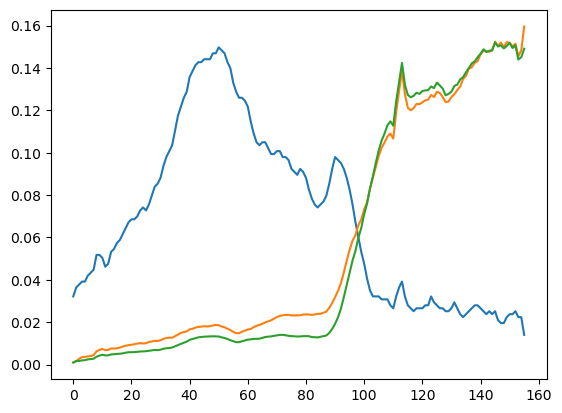

In [14]:
plt.plot(danmf.W[:,0])
plt.plot(danmf.W[:,1])
plt.plot(danmf.W[:,2])
#plt.plot(sy[:,0])
#plt.plot(sy[:,5000])

In [15]:
danmf.T

1

In [16]:
for i in range(1000):
    danmf.one_iterate(sy)

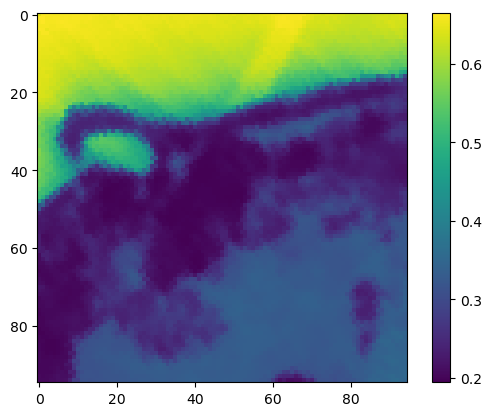

In [17]:
plt.imshow(danmf.H[0].reshape(95,95))
plt.colorbar()

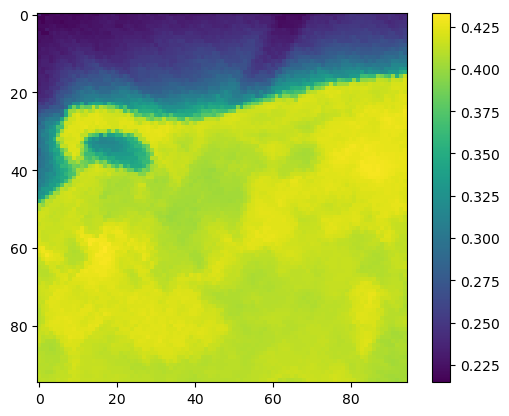

In [18]:
plt.imshow(danmf.H[1].reshape(95,95))
plt.colorbar()

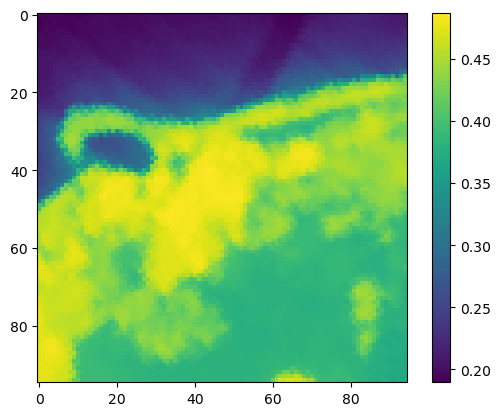

In [19]:
plt.imshow(danmf.H[2].reshape(95,95))
plt.colorbar()

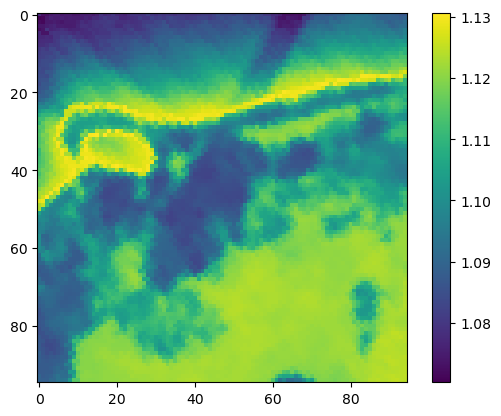

In [20]:
plt.imshow(np.sum(danmf.H,axis=0).reshape(95,95))
plt.colorbar()

In [284]:
jasper = sio.loadmat("/home/josephg/Documents/EDAA_unmixing/JasperRidge.mat")
ji = (jasper['Y'].T / np.sqrt(np.sum(jasper['Y']**2, axis=1))).T

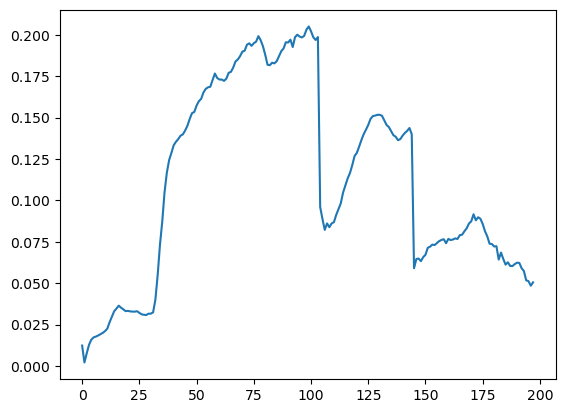

In [285]:
plt.plot(ji[:,0])

In [340]:
danmf = DA_NMF(initial_regularization=1, n_components=4, decay_rate=10000, delta=1)

In [341]:
danmf._initialize(ji)

In [342]:
danmf.T

1

In [ ]:
for i in range(10000):
    danmf.one_iterate(ji)

In [ ]:
for i in range(4):
    plt.imshow(danmf.H[i].reshape(100,100))
    plt.colorbar()
    plt.show()

In [ ]:
for i in range(4):
    plt.plot(danmf.W[:,i])